In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
# sns.set_theme(style="darkgrid")
%matplotlib inline

In [78]:
df = pd.read_csv(r"winequality-white.csv", delimiter= ';')

In [79]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [80]:
logreg = make_pipeline(StandardScaler(), LogisticRegression())

In [81]:
df['quality'] = df['quality'] /10
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0.6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0.6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0.6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0.6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0.6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0.5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0.6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0.7


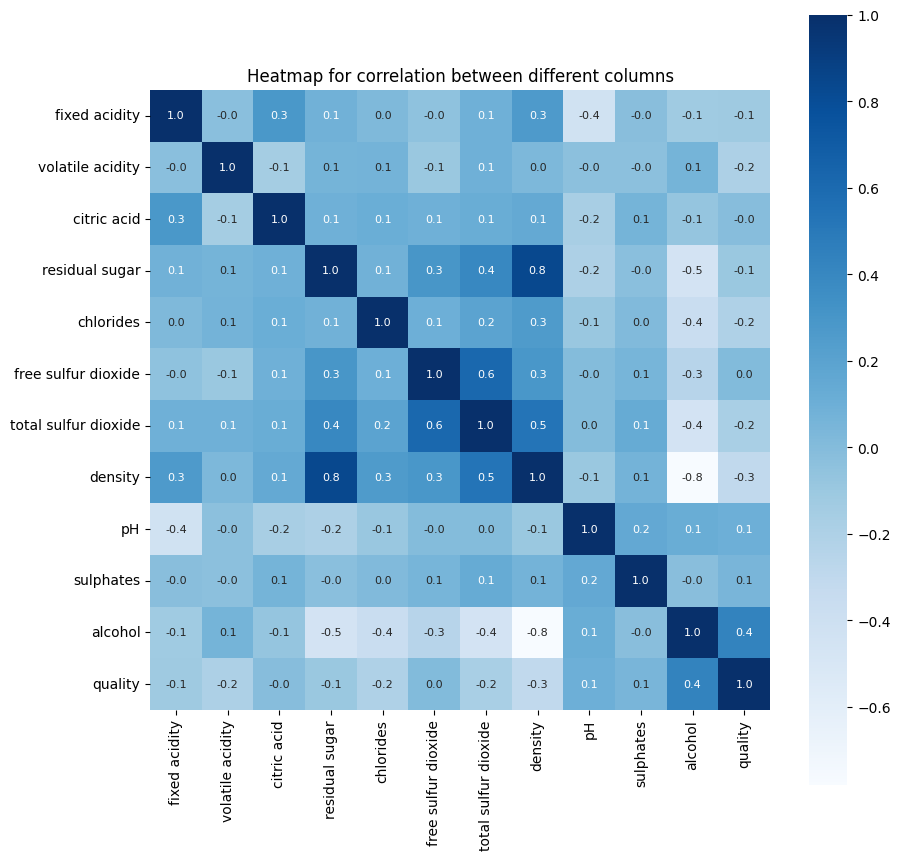

In [82]:
plt.figure(figsize=(10,10))
correlation = df.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title("Heatmap for correlation between different columns")
plt.show()

In [83]:
# Splitting features and target

X = df.drop(columns="quality", axis = 1)

# Label Binarization

Y = df['quality'] .apply(lambda y_value: 1 if y_value >= 0.6 else 0)

# Splitting data into data training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=5)

In [84]:
Y.value_counts()

1    3258
0    1640
Name: quality, dtype: int64

In [85]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape,)

(4898, 11) (3428, 11) (1470, 11)
(4898,) (3428,) (1470,)


In [86]:
logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
score = logreg.score(X_test, Y_test)
# acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
# acc_log
print("{:.2%}". format(score))

76.19%


In [87]:
pred = logreg.predict(X_test)
pred.shape

(1470,)

In [88]:
logreg.named_steps['logisticregression'].coef_[0]

array([ 0.13491924, -0.66954288, -0.0215831 ,  1.01687293,  0.0542736 ,
        0.15336154, -0.03347389, -1.12135194,  0.19447051,  0.25995511,
        0.72656273])

In [89]:
unique, counts = np.unique(Y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 492]
 [  1 978]]


In [90]:
unique, counts = np.unique(Y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0  354]
 [   1 1116]]


In [91]:
df_norr = (df - df.min())/(df.max() - df.min())
df_norr.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527,0.479652
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487,0.147606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935,0.333333
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097,0.500000
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [168]:
df_norr.quality.value_counts().sort_values()

1.000000       5
0.000000      20
0.166667     163
0.833333     175
0.666667     880
0.333333    1457
0.500000    2198
Name: quality, dtype: int64

In [169]:
Y = df_norr['quality'].apply(lambda y_value: 1 if y_value >= 0.6 else 0)
Y.value_counts()

0    3838
1    1060
Name: quality, dtype: int64

In [170]:
logreg_norr = LogisticRegression()

# Splitting features and target

X = df_norr.drop(columns="quality", axis = 1)

# Label Binarization

Y = df_norr['quality'].apply(lambda y_value: 1 if y_value >= 0.6 else 0)

# Splitting data into data training and testing
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

# logreg_norr = logreg_norr.fit(X_train1, Y_train1)
# Y_pred1 = logreg_norr.predict(X_test1)
# score = logreg_norr.score()

In [171]:
print(X.shape, X_train1.shape, X_test1.shape)
print(Y.shape, Y_train1.shape, Y_test1.shape,)

(4898, 11) (3428, 11) (1470, 11)
(4898,) (3428,) (1470,)


In [172]:
logreg_norr = logreg_norr.fit(X_train1, Y_train1)
cor_norr = pd.DataFrame(X_train1.columns)
cor_norr.columns = ['Feature']
cor_norr['Correlation'] = logreg_norr.coef_[0]
cor_norr

,Feature,Correlation
0,fixed acidity,0.206849
1,volatile acidity,-2.703109
2,citric acid,-0.767747
3,residual sugar,2.381604
4,chlorides,-2.142660
5,free sulfur dioxide,1.753959
6,total sulfur dioxide,-1.150209
7,density,-0.891688
8,pH,1.150534
9,sulphates,0.940795


In [187]:
dummy = df_norr['quality'] >= 0.6
X_test2 = df_norr[dummy].drop(columns = ['quality'], axis =1)
Y_test2 = df_norr[dummy]['quality'].apply(lambda y_value: 1)
X_test2
# logreg_norr.predict(X['quality'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
13,0.269231,0.078431,0.240964,0.013804,0.103858,0.160279,0.310905,0.078851,0.745455,0.348837,0.709677
15,0.269231,0.088235,0.228916,0.013804,0.068249,0.090592,0.238979,0.082707,0.481818,0.383721,0.548387
17,0.230769,0.568627,0.289157,0.009202,0.059347,0.094077,0.153132,0.040293,0.554545,0.197674,0.774194
20,0.230769,0.568627,0.289157,0.009202,0.059347,0.094077,0.153132,0.040293,0.554545,0.197674,0.774194
21,0.250000,0.225490,0.228916,0.035276,0.086053,0.059233,0.215777,0.078851,0.409091,0.151163,0.483871
...,...,...,...,...,...,...,...,...,...,...,...
4870,0.221154,0.235294,0.168675,0.092025,0.035608,0.094077,0.285383,0.091961,0.390909,0.162791,0.556452
4876,0.230769,0.294118,0.253012,0.029141,0.086053,0.111498,0.250580,0.081164,0.581818,0.430233,0.580645
4886,0.230769,0.127451,0.168675,0.078221,0.056380,0.149826,0.259861,0.088105,0.445455,1.000000,0.669355
4887,0.230769,0.323529,0.132530,0.019939,0.041543,0.010453,0.109049,0.041835,0.290909,0.662791,0.806452


In [188]:
Y_test2

13      1
15      1
17      1
20      1
21      1
       ..
4870    1
4876    1
4886    1
4887    1
4896    1
Name: quality, Length: 1060, dtype: int64

In [189]:
score2 = logreg_norr.score(X_test2, Y_test2)
score2

0.2641509433962264

In [174]:
Y_pred = logreg_norr.predict(X_test1)
# unique, counts = np.unique(Y_pred, return_counts=True)
# print(np.asarray((unique, counts)).T)
Y_test1.mean()

0.2163265306122449

In [175]:
score = logreg_norr.score(X_test1, Y_test1)
print("{:.2%}". format(score))

80.14%


In [11]:
classifier = RandomForestClassifier()

In [13]:
classifier.fit (X_train, Y_train)

RandomForestClassifier()

In [14]:
train_p = classifier.predict(X_train)
test_p = classifier.predict(X_test)

In [15]:
print(f"Training data accuracy : {accuracy_score(Y_train, train_p)}")
print(f"Test data accuracy : {accuracy_score(Y_test, test_p)}")

Training data accuracy : 1.0
Test data accuracy : 0.8829931972789116
